In [1]:
from scripts import data_cleaner, explore_data, model

In [2]:
cleaner = data_cleaner.DataCleaner("sales_dataset.json")
cleaner.load_data()
cleaner.clean_data()
df = cleaner.get_cleaned_data()
df.head()

,customer_id,customer_name,age,email,country,purchase_date,product_category,product_name,product_price,quantity_purchased,payment_method,discount_applied,return_requested,return_reason,customer_segment,repeat_purchase,purchase_amount,total_spent
0,6853,Patricia Washington,58.602176,curtis26@example.net,British Virgin Islands,2020-01-01,Sports & Outdoors,Bicycle,306.369814,3,Credit Card,0.117200,0.0,Arrived Late,Premium,0,811.389948,918.992242
1,5884,Brittany Garza,29.256351,kevinferguson@example.org,Albania,2020-01-01,Electronics,Smartwatch,403.396062,3,Bank Transfer,0.231329,0.0,Arrived Late,Premium,0,930.236107,1209.956858
2,7208,Kayla Fernandez,47.557728,None,Belarus,2020-01-01,Home & Kitchen,Air Fryer,461.269257,1,Debit Card,0.018676,0.0,Wrong Size,Loyal Customer,0,452.654492,461.250581
3,4553,Andre Eaton,44.392187,ktorres@example.org,Macao,2020-01-01,Sports & Outdoors,Yoga Mat,65.980359,2,Debit Card,0.058683,0.0,Changed Mind,New Customer,0,124.216907,131.902035
4,9756,Lisa Wilson,49.813695,geraldjenkins@example.com,Bangladesh,2020-01-02,Clothing,Jeans,479.961495,1,Debit Card,0.259778,0.0,Arrived Late,Loyal Customer,0,355.277893,479.701717


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17680 entries, 0 to 17679
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   customer_id         17680 non-null  int64         
 1   customer_name       17680 non-null  object        
 2   age                 17680 non-null  float64       
 3   email               15907 non-null  object        
 4   country             17680 non-null  object        
 5   purchase_date       17680 non-null  datetime64[ns]
 6   product_category    17680 non-null  object        
 7   product_name        17680 non-null  object        
 8   product_price       17680 non-null  float64       
 9   quantity_purchased  17680 non-null  int64         
 10  payment_method      17680 non-null  object        
 11  discount_applied    17680 non-null  float64       
 12  return_requested    17680 non-null  float64       
 13  return_reason       17680 non-null  object        


In [4]:
explorer = explore_data.ExploreData(df)

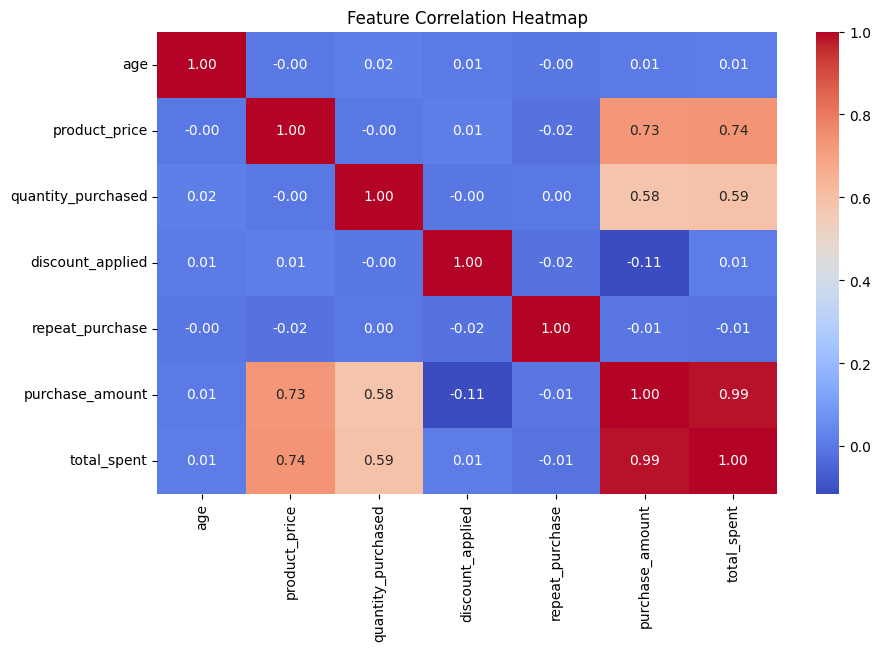

In [5]:
explorer.correlation_heatmap()

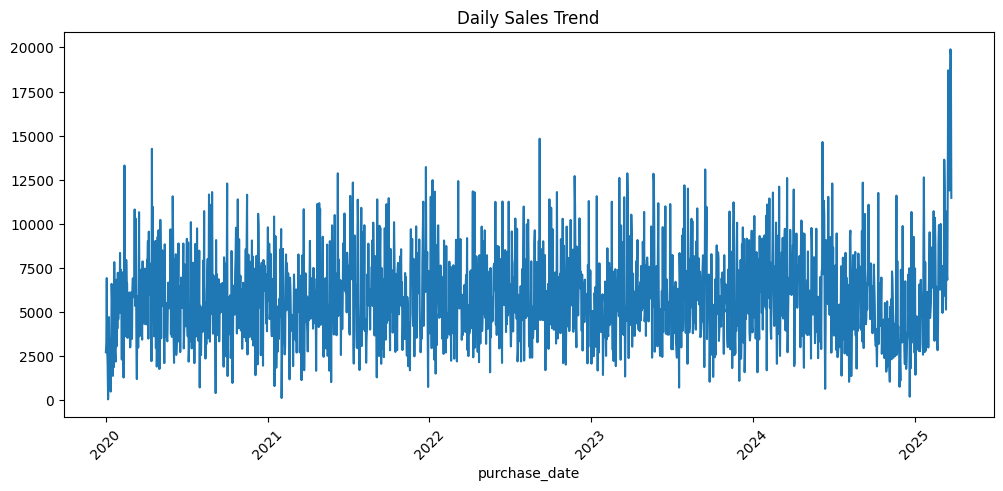

In [6]:
explorer.daily_sales_trend()

In [7]:
some_countries = df.country.iloc[:10].values

In [8]:
country_stats = explorer.country_statistics(some_countries)
country_stats

,customer_count,return_rate,avg_purchase
country,,,
British Virgin Islands,58,0.066667,614.761080
Albania,61,0.030769,614.942484
Belarus,65,0.108108,578.381201
Macao,63,0.066667,608.647519
Bangladesh,66,0.075949,705.882906
Montserrat,69,0.077922,734.990255
Lao People's Democratic Republic,68,0.118421,618.146068
Bermuda,54,0.047619,585.876003
Saint Martin,75,0.090909,694.841930


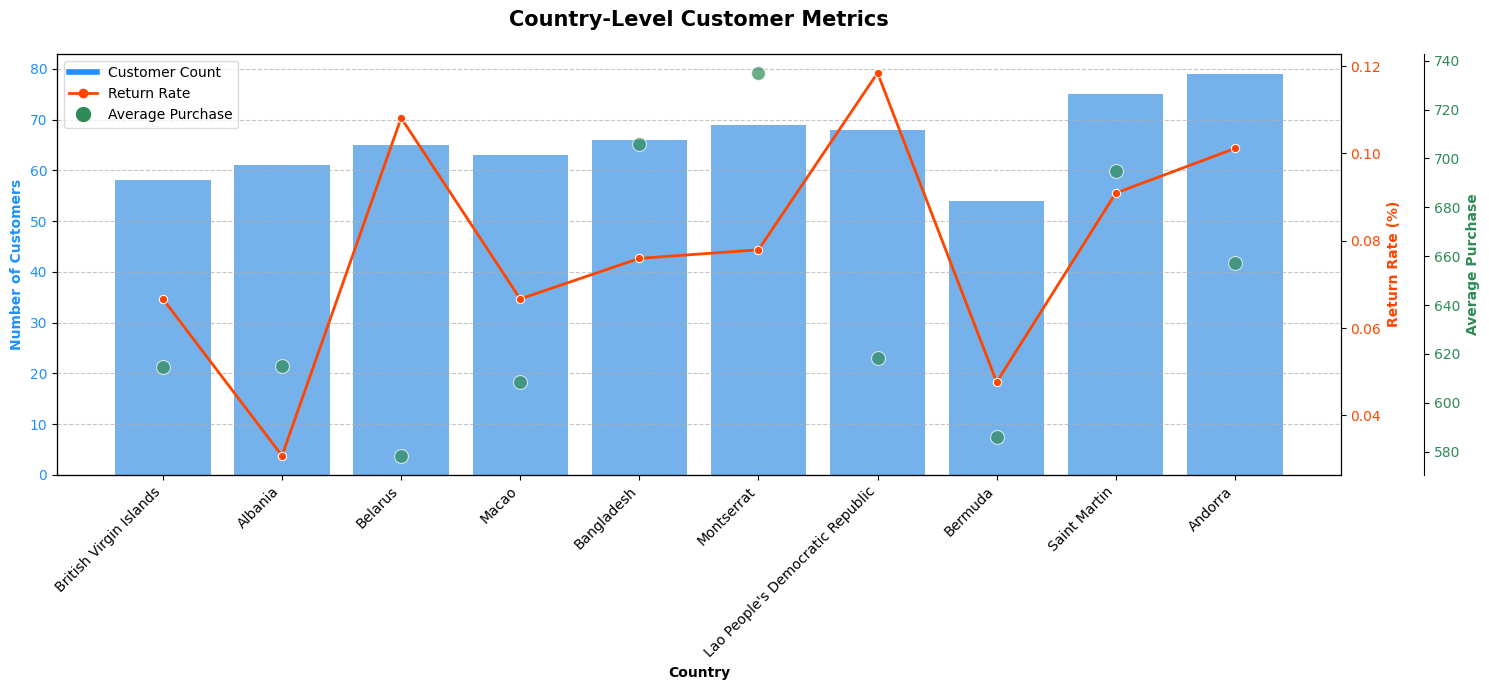

In [9]:
explorer.create_country_stats_plot(country_stats)

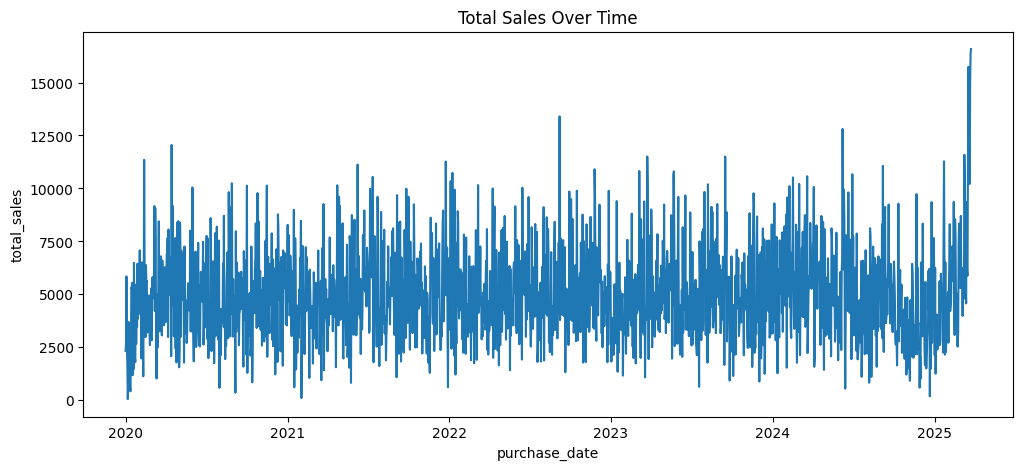

14:28:44 - cmdstanpy - INFO - Chain [1] start processing
14:28:45 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\USER\Downloads\Interview\scripts\model.py:58: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  future[self.exog_vars] = future[self.exog_vars].fillna(method='ffill').fillna(0)
C:\Users\USER\Downloads\Interview\scripts\model.py:65: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  future[self.exog_vars] = future[self.exog_vars].fillna(method='ffill').fillna(0)


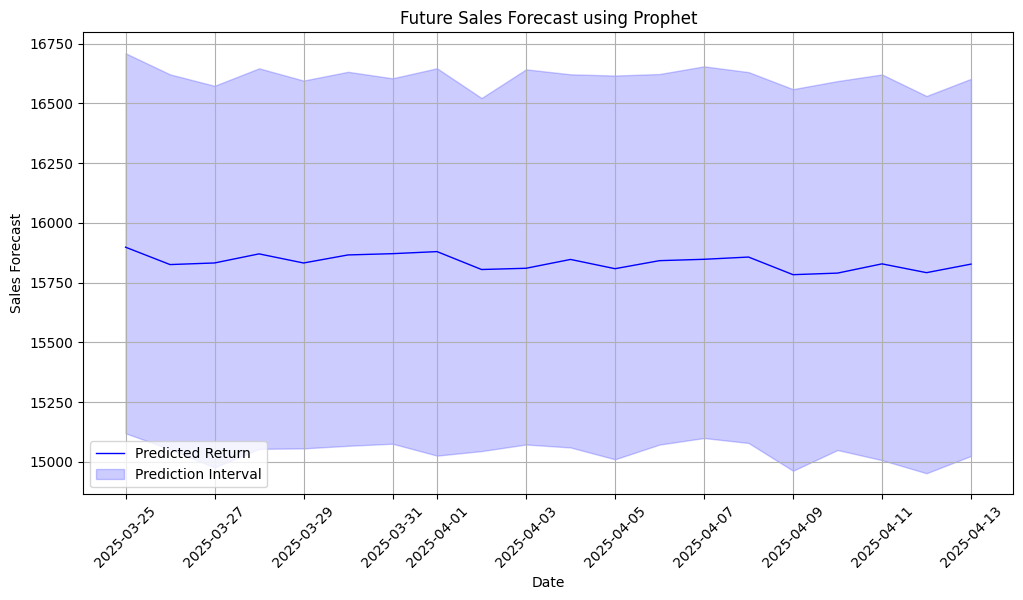

In [10]:
sales_forecast = model.SalesForecasting(df)
train_size = int(0.8 * len(df))
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Preprocess data
sales_forecast.preprocess_sales_data()

# Plot sales trend
sales_forecast.plot_sales_trend()

# Train Prophet model
sales_forecast.train_prophet_model()

# Forecast sales and evaluate
prophet_predictions, future_forecast = sales_forecast.forecast_sales(test)
